# Estatisticas e visualizações

In [22]:
import pandas as pd
import numpy as np

In [23]:
# carregando o df pré processado

df = pd.read_csv('pre_processado_completo.csv', parse_dates=['date'])
df.head()

,city,state,country,shape,duration_m,comments,latitude,longitude,date
0,san marcos,tx,us,cylinder,45.000000,This event took place in early fall around 194...,29.883056,-97.941111,1949-10-10
1,lackland afb,tx,NaN,light,120.000000,1949 Lackland AFB&#44 TX. Lights racing acros...,29.384210,-98.581082,1949-10-10
2,chester (uk/england),NaN,gb,circle,0.333333,Green/Orange circular disc over Chester&#44 En...,53.200000,-2.916667,1955-10-10
3,edna,tx,us,circle,0.333333,My older brother and twin sister were leaving ...,28.978333,-96.645833,1956-10-10
4,kaneohe,hi,us,light,15.000000,AS a Marine 1st Lt. flying an FJ4B fighter/att...,21.418056,-157.803611,1960-10-10


## Analisando a quantidade de avistamentos por países

In [24]:
# definindo qual país tem a maior quantidade de reports de avistamento

df_c = df[['country']]
df_c = df_c.groupby(['country'])['country'].count().to_frame()
df_c = df_c.rename(columns={'country': 'qtd_avistamento_por_pais'})
df_c

,qtd_avistamento_por_pais
country,
au,593
ca,3266
de,112
gb,2050
us,70290


In [25]:
maxc_qtd = list(df_c.max())
maxc_name = list(df_c.idxmax())

print(f'A quantidade máxima de avistamentos por países foi de {maxc_qtd} no país {maxc_name}')

A quantidade máxima de avistamentos por países foi de [70290] no país ['us']


## Analisando a quantidade de avistamentos por estados no país com maior quantidade de avistamentos [US]

In [26]:
# definindo qual estado do US tem a maior quantidade de reports de avistamento

df_s = df.loc[df['country'] == maxc_name[0]]
df_s = df_s.groupby(['state'])['state'].count().to_frame()
df_s = df_s.rename(columns={'state': 'qtd_avistamento_por_state'})
df_s.head()

,qtd_avistamento_por_state
state,
ak,341
al,706
ar,642
az,2616
ca,9574


In [27]:
df_s

,qtd_avistamento_por_state
state,
ak,341
al,706
ar,642
az,2616
ca,9574
co,1521
ct,971
dc,7
de,180


In [28]:
maxs_qtd = list(df_s.max())
maxs_name = list(df_s.idxmax())

print(f'A quantidade máxima de avistamentos por estados foi de {maxs_qtd} no estado {maxs_name}')

A quantidade máxima de avistamentos por estados foi de [9574] no estado ['ca']


## Analisando a quantidade de avistamentos por cidades no estado com maior quantidade de avistamentos [CA]

In [29]:
# definindo qual cidade da CA tem a maior quantidade de reports de avistamento 

df_ci = df.loc[(df['country'] == maxc_name[0]) & (df['state'] == maxs_name[0])]
df_ci = df_ci.groupby(['city'])['city'].count().to_frame()
df_ci = df_ci.rename(columns={'city': 'qtd_avistamento_por_city'})
df_ci.head()

,qtd_avistamento_por_city
city,
acampo,1
acton,5
acton (approx.),1
adelanto,5
agoura hills,6


In [30]:
maxci_qtd = list(df_ci.max())
maxci_name = list(df_ci.idxmax())

print(f'A quantidade máxima de avistamentos por cidades foi de {maxci_qtd} na cidade {maxci_name}')

A quantidade máxima de avistamentos por cidades foi de [372] na cidade ['los angeles']


## Limitando o dataframe para a cidade com maior quantidade de avistamentos [LA]

In [31]:
# limitando o DF para US - Califórnia - Los Angeles

df_max = df.loc[(df['country'] == maxc_name[0]) & (df['state'] == maxs_name[0]) & (df['city'] == maxci_name[0])]
df_max

,city,state,country,shape,duration_m,comments,latitude,longitude,date
158,los angeles,ca,us,oval,0.166667,Egg UFO over Hollywood Hills and LAX in LOS AN...,34.052222,-118.242778,2005-10-10
332,los angeles,ca,us,light,5.000000,It was a large bright light sitting stationary...,34.052222,-118.242778,1999-10-11
376,los angeles,ca,us,rectangle,0.333333,Large&#44 rectangular&#44 pale green-blue obje...,34.052222,-118.242778,2004-10-11
440,los angeles,ca,us,triangle,0.500000,Large Triangle sighted over L.A,34.052222,-118.242778,2008-10-11
854,los angeles,ca,us,formation,25.000000,4 UFOs in a big arrowlike formation at high al...,34.052222,-118.242778,2005-10-01
...,...,...,...,...,...,...,...,...,...
87008,los angeles,ca,us,oval,15.000000,White oval object traveling overhead northeast...,34.052222,-118.242778,2012-09-30
87182,los angeles,ca,us,oval,0.083333,UFO with intense lights seen over LA on Sept. ...,34.052222,-118.242778,2009-09-03
88043,los angeles,ca,us,light,2.000000,Orange light climbs 3 minutes straight up into...,34.052222,-118.242778,2005-09-07
88295,los angeles,ca,us,light,0.500000,Two steady&#44 white lights heading northeast ...,34.052222,-118.242778,2009-09-08


## Analisando a quantidade de avistamentos em LA

### Por ano

In [32]:
# agrupando o df por anos e contando os avistamentos

df_year = df_max.groupby([df['date'].dt.year])['date'].count().to_frame()
df_year = df_year.rename(columns={'date': 'qtd_avistamento_por_ano'})

Text(0, 0.5, 'QUANTIDADE')

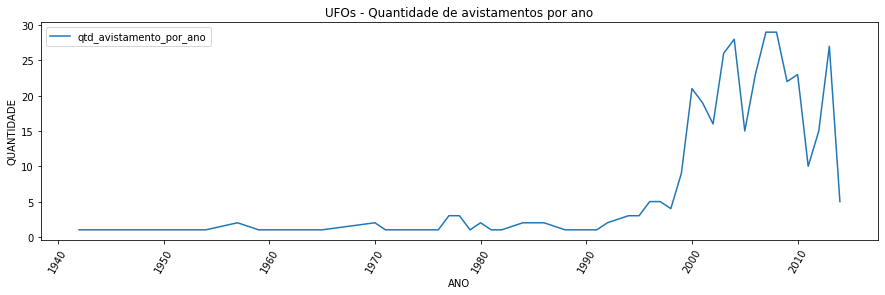

In [33]:
fig = df_year.plot(title='UFOs - Quantidade de avistamentos por ano', rot=60, figsize=(15,4))
fig.set_xlabel('ANO')
fig.set_ylabel('QUANTIDADE')

### A partir de 2000

In [35]:
# limitando o df a partir do ano 2000, que possui maior quantidade de avistamentos

df_2000 = df_max.loc[(df['date'].dt.year >= 2000)]

In [36]:
# agrupando o df por anos a partir de 2000 e contando os avistamentos

df_2000 = df_2000.groupby([df['date'].dt.year])['date'].count().to_frame()
df_2000 = df_2000.rename(columns={'date': 'qtd_avistamento_por_ano'})
df_2000.head()

,qtd_avistamento_por_ano
date,
2000,21
2001,19
2002,16
2003,26
2004,28


Text(0, 0.5, 'QUANTIDADE')

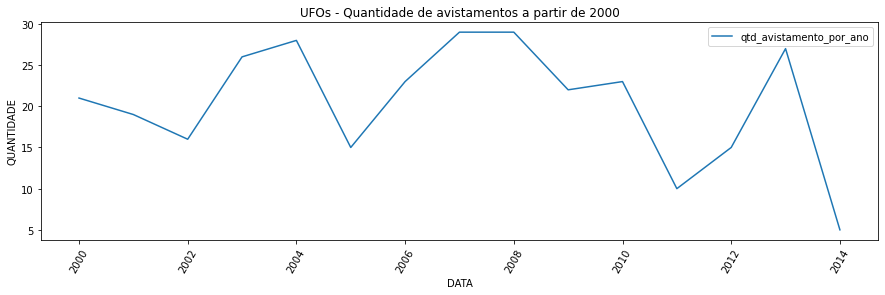

In [37]:
fig = df_2000.plot(title='UFOs - Quantidade de avistamentos a partir de 2000', rot=60, figsize=(15,4))
fig.set_xlabel('DATA')
fig.set_ylabel('QUANTIDADE')

# Analisando o formato dos avistamentos em LA

In [38]:
df_shapes = df_max[['shape']]
df_shapes

,shape
158,oval
332,light
376,rectangle
440,triangle
854,formation
...,...
87008,oval
87182,oval
88043,light
88295,light


In [39]:
# contando a quantidade de formatos avistados
shapes = df_shapes.value_counts()
shapes

shape    
light        66
unknown      49
circle       40
triangle     32
disk         31
fireball     29
sphere       25
oval         22
cigar        17
changing     15
formation    11
chevron       6
flash         5
rectangle     5
diamond       4
cone          4
teardrop      4
cylinder      1
dtype: int64

In [40]:
# transformando a contagem em porcentagem

shapes_pct = ((shapes/len(df_shapes))*100)
shapes_pct

shape    
light        17.741935
unknown      13.172043
circle       10.752688
triangle      8.602151
disk          8.333333
fireball      7.795699
sphere        6.720430
oval          5.913978
cigar         4.569892
changing      4.032258
formation     2.956989
chevron       1.612903
flash         1.344086
rectangle     1.344086
diamond       1.075269
cone          1.075269
teardrop      1.075269
cylinder      0.268817
dtype: float64

Text(0, 0.5, 'PORCENTAGEM DE AVISTAMENTOS')

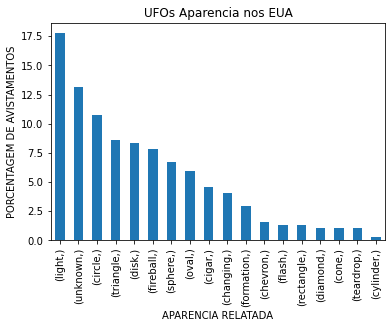

In [41]:
fig = shapes_pct.plot(kind='bar', title='UFOs Aparencia nos EUA')
fig.set_xlabel('APARENCIA RELATADA')
fig.set_ylabel('PORCENTAGEM DE AVISTAMENTOS')

# Tempo médio de avistamento em LA

In [42]:
df_duration = df_max[['duration_m']]
df_duration.head()

,duration_m
158,0.166667
332,5.000000
376,0.333333
440,0.500000
854,25.000000


In [43]:
# calculando o tempo médio por avistamentos

duration_mean = df_duration['duration_m'].mean()
duration_mean

12.067965949820792